Tate gallery artworks metadata-- source at https://github.com/tategallery/collection
So basically experimenting with the dataset and see what insights I can get out of it

In [1]:
import pymongo
mongoClient = pymongo.MongoClient()
tateDb = mongoClient.tateGalleryMeta
tateCollection = tateDb.artworks

Number of records in the gallery:

In [5]:
print (tateCollection.count())

55594


Some random questions I want to ask--
- number of artworks by > 1 artist
- artwork acquistion by year
- artwork acquistion year vs year created/artist death
- by gender
- by country and year
- types of artwork
- sentiments of titles?


Keys
acno : accession number
acquisitionYear
all_artists
contributorCount
contributors (object)

contributorCount distribution

In [6]:
#distinct number of artisits:
print (tateCollection.distinct('contributorCount'))

[1, 2, 3]


In [7]:
from bson.code import Code
reducer = Code("""
    function(obj, prev){
        prev.count++;
        }
        """)
contributorNumberGroup = tateCollection.group(key={"contributorCount": 1},
                                              condition={}, initial={'count': 0}, reduce= reducer)
for doc in contributorNumberGroup:
    print(doc)
    

{'count': 55324.0, 'contributorCount': 1.0}
{'count': 267.0, 'contributorCount': 2.0}
{'count': 3.0, 'contributorCount': 3.0}


Acquistion years:

In [8]:
acYearGroup = tateCollection.group(key={"acquisitionYear": 1, "all_artists": 1},
  condition={}, initial={'count': 0}, reduce= reducer)

acYearGroupSorted = sorted(acYearGroup, key=lambda x: (x['acquisitionYear'] is None, x['acquisitionYear']), reverse=False)

for doc in acYearGroupSorted:
    print(doc)

{'count': 1.0, 'all_artists': 'Richard Wilson', 'acquisitionYear': 1823.0}
{'count': 1.0, 'all_artists': 'William Hogarth', 'acquisitionYear': 1824.0}
{'count': 1.0, 'all_artists': 'Sir David Wilkie', 'acquisitionYear': 1824.0}
{'count': 1.0, 'all_artists': 'Sir David Wilkie', 'acquisitionYear': 1826.0}
{'count': 2.0, 'all_artists': 'Sir Joshua Reynolds', 'acquisitionYear': 1826.0}
{'count': 1.0, 'all_artists': 'Benjamin West', 'acquisitionYear': 1826.0}
{'count': 1.0, 'all_artists': 'Benjamin West', 'acquisitionYear': 1827.0}
{'count': 1.0, 'all_artists': 'Sir George Howland Beaumont, Bt', 'acquisitionYear': 1828.0}
{'count': 1.0, 'all_artists': 'Benjamin West', 'acquisitionYear': 1828.0}
{'count': 1.0, 'all_artists': 'Sir Joshua Reynolds', 'acquisitionYear': 1828.0}
{'count': 1.0, 'all_artists': 'Sir Joshua Reynolds', 'acquisitionYear': 1830.0}
{'count': 1.0, 'all_artists': 'John Singleton Copley', 'acquisitionYear': 1830.0}
{'count': 1.0, 'all_artists': 'John Opie', 'acquisitionYear

Artist work counts:

In [9]:
artistGroup = tateCollection.group(key={"all_artists": 1},
                                              condition={}, initial={'count': 0}, reduce= reducer)

artistGroupSorted = sorted(artistGroup, key=lambda x: x['count'], reverse=True)

for doc in artistGroupSorted:
    print(doc)

{'count': 37722.0, 'all_artists': 'Joseph Mallord William Turner'}
{'count': 1044.0, 'all_artists': 'George Jones'}
{'count': 567.0, 'all_artists': 'Joseph Beuys'}
{'count': 562.0, 'all_artists': 'Henry Moore OM, CH'}
{'count': 332.0, 'all_artists': 'Sir Eduardo Paolozzi'}
{'count': 271.0, 'all_artists': 'Tom Phillips'}
{'count': 266.0, 'all_artists': 'Andy Warhol'}
{'count': 198.0, 'all_artists': 'León Ferrari'}
{'count': 168.0, 'all_artists': 'John Piper'}
{'count': 163.0, 'all_artists': 'R.B. Kitaj'}
{'count': 162.0, 'all_artists': 'Joseph Mallord William Turner, Thomas Girtin'}
{'count': 150.0, 'all_artists': 'Thomas Schütte'}
{'count': 148.0, 'all_artists': 'Joe Tilson'}
{'count': 135.0, 'all_artists': 'Sir Edward Coley Burne-Jones, Bt'}
{'count': 130.0, 'all_artists': 'Barry Flanagan'}
{'count': 129.0, 'all_artists': 'John Walker'}
{'count': 125.0, 'all_artists': 'Richard Hamilton'}
{'count': 125.0, 'all_artists': 'Sir Sidney Nolan'}
{'count': 124.0, 'all_artists': 'William Blake

As noted by many people, Tate has tons and tons of Turner works!

In [10]:
for doc in artistGroupSorted[:10]:
    print(doc)

{'count': 37722.0, 'all_artists': 'Joseph Mallord William Turner'}
{'count': 1044.0, 'all_artists': 'George Jones'}
{'count': 567.0, 'all_artists': 'Joseph Beuys'}
{'count': 562.0, 'all_artists': 'Henry Moore OM, CH'}
{'count': 332.0, 'all_artists': 'Sir Eduardo Paolozzi'}
{'count': 271.0, 'all_artists': 'Tom Phillips'}
{'count': 266.0, 'all_artists': 'Andy Warhol'}
{'count': 198.0, 'all_artists': 'León Ferrari'}
{'count': 168.0, 'all_artists': 'John Piper'}
{'count': 163.0, 'all_artists': 'R.B. Kitaj'}


In [11]:
print('Comparing number of Turner works in Tate to the next artist')
print(artistGroupSorted[0]['count']/artistGroupSorted[1]['count'])

Comparing number of Turner works in Tate to the next artist
36.132183908045974


Now I wonder how the turner works are distributed over the years:


In [12]:
turner =  tateCollection.group(key={"acquisitionYear": 1},
  condition={'all_artists': 'Joseph Mallord William Turner'}, initial={'count': 0}, reduce= reducer)

turnerSorted = sorted(turner, key=lambda x: (x['acquisitionYear'] is None, x['acquisitionYear']), reverse=False)
for doc in turnerSorted:
    print(doc)
    

{'count': 4.0, 'acquisitionYear': 1847.0}
{'count': 37520.0, 'acquisitionYear': 1856.0}
{'count': 1.0, 'acquisitionYear': 1885.0}
{'count': 1.0, 'acquisitionYear': 1910.0}
{'count': 2.0, 'acquisitionYear': 1913.0}
{'count': 154.0, 'acquisitionYear': 1925.0}
{'count': 1.0, 'acquisitionYear': 1938.0}
{'count': 8.0, 'acquisitionYear': 1940.0}
{'count': 1.0, 'acquisitionYear': 1944.0}
{'count': 1.0, 'acquisitionYear': 1945.0}
{'count': 1.0, 'acquisitionYear': 1958.0}
{'count': 28.0, 'acquisitionYear': None}


hmm, really? most of them are acquired in 1856?

aha, according to http://www.tate.org.uk/research/prints-and-drawings-rooms/turner-bequest, 
>After J.M.W. Turner’s death in 1851, the contents of his studio became the property of the nation. The Turner Bequest comprises around 30,000 works of art on paper

and the artwork tags are 
>Accepted by the nation as part of the Turner Bequest 1856

much better to look at artwork year, I suppose. That'll be the `dateRange.startYear` attribute (there's endYear too but leave it for now)

In [13]:
turner2 =  tateCollection.group(key={"dateRange": 1},
  condition={'all_artists': 'Joseph Mallord William Turner'}, initial={'count': 0}, reduce= reducer)


#turner2Sorted = sorted(turner2, key=lambda x:  x['dateRange']['startYear'], reverse=False)
turner2Sorted = []
turner2None = []
for doc in turner2:
    if doc['dateRange'] is not None:
        turner2Sorted.append({'startYear': int(doc['dateRange']['startYear']), 'count': doc['count']})
        #print(doc['dateRange']['startYear'], doc['count'])
    else :
        turner2None.append({'startYear': "none", 'count': doc['count']})

for doc in sorted(turner2Sorted, key=lambda x: x['startYear'], reverse=False):
    print(doc)

{'startYear': 1787, 'count': 2.0}
{'startYear': 1787, 'count': 1.0}
{'startYear': 1787, 'count': 1.0}
{'startYear': 1787, 'count': 1.0}
{'startYear': 1789, 'count': 46.0}
{'startYear': 1789, 'count': 3.0}
{'startYear': 1789, 'count': 1.0}
{'startYear': 1789, 'count': 1.0}
{'startYear': 1789, 'count': 1.0}
{'startYear': 1790, 'count': 1.0}
{'startYear': 1790, 'count': 1.0}
{'startYear': 1790, 'count': 2.0}
{'startYear': 1790, 'count': 1.0}
{'startYear': 1791, 'count': 5.0}
{'startYear': 1791, 'count': 7.0}
{'startYear': 1791, 'count': 3.0}
{'startYear': 1791, 'count': 52.0}
{'startYear': 1791, 'count': 1.0}
{'startYear': 1791, 'count': 1.0}
{'startYear': 1792, 'count': 7.0}
{'startYear': 1792, 'count': 22.0}
{'startYear': 1792, 'count': 26.0}
{'startYear': 1792, 'count': 33.0}
{'startYear': 1792, 'count': 10.0}
{'startYear': 1792, 'count': 1.0}
{'startYear': 1793, 'count': 27.0}
{'startYear': 1793, 'count': 34.0}
{'startYear': 1793, 'count': 4.0}
{'startYear': 1793, 'count': 2.0}
{'star

In [14]:
import pandas as pd


In [15]:
turnerDFSummary = pd.DataFrame(turner2Sorted)

In [16]:
turnerDFSummary


,count,startYear
0,8,1837
1,1,1810
2,31,1812
3,137,1807
4,232,1808
5,335,1809
6,652,1811
7,2,1811
8,750,1816
9,541,1814


In [17]:
df2 = turnerDFSummary.groupby('startYear')['count'].sum()

In [18]:
df2


startYear
1787       5
1789      52
1790       5
1791      69
1792      99
1793      74
1794     194
1795     262
1796     287
1797     271
1798     777
1799     971
1800     125
1801    1511
1802     804
1803       5
1804     166
1805     803
1806     353
1807     480
1808     692
1809     725
1810     490
1811     767
1812     217
1813     354
1814     588
1815     375
1816    1611
1817    1092
        ... 
1820     507
1821     308
1822     307
1823     407
1824    1022
1825    1057
1826    1060
1827     630
1828    1359
1829     326
1830    2383
1831    1485
1832    1084
1833    1280
1834    1040
1835     955
1836     368
1837     394
1838       2
1839     740
1840     983
1841     755
1842      48
1843      89
1844     435
1845     576
1846       7
1847       1
1850       3
1856       1
Name: count, dtype: float64

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

In [31]:
type(df2)

pandas.core.series.Series

In [40]:
df2.values

array([  5.00000000e+00,   5.20000000e+01,   5.00000000e+00,
         6.90000000e+01,   9.90000000e+01,   7.40000000e+01,
         1.94000000e+02,   2.62000000e+02,   2.87000000e+02,
         2.71000000e+02,   7.77000000e+02,   9.71000000e+02,
         1.25000000e+02,   1.51100000e+03,   8.04000000e+02,
         5.00000000e+00,   1.66000000e+02,   8.03000000e+02,
         3.53000000e+02,   4.80000000e+02,   6.92000000e+02,
         7.25000000e+02,   4.90000000e+02,   7.67000000e+02,
         2.17000000e+02,   3.54000000e+02,   5.88000000e+02,
         3.75000000e+02,   1.61100000e+03,   1.09200000e+03,
         5.49000000e+02,   3.03400000e+03,   5.07000000e+02,
         3.08000000e+02,   3.07000000e+02,   4.07000000e+02,
         1.02200000e+03,   1.05700000e+03,   1.06000000e+03,
         6.30000000e+02,   1.35900000e+03,   3.26000000e+02,
         2.38300000e+03,   1.48500000e+03,   1.08400000e+03,
         1.28000000e+03,   1.04000000e+03,   9.55000000e+02,
         3.68000000e+02,

<Container object of 62 artists>

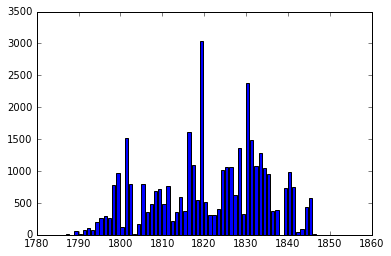

In [43]:
plt.bar(df2.keys(), df2.values)

1819 seems like a very active year for Turner! At first I was a bit dubious about whether I got the number of works correct but apparently he left more than 19000 works behind so I guess I'm not too far off